In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Times New Roman"})

In [2]:
start_year_cyber_valley = 2017
start_year_ml_tue = 2019

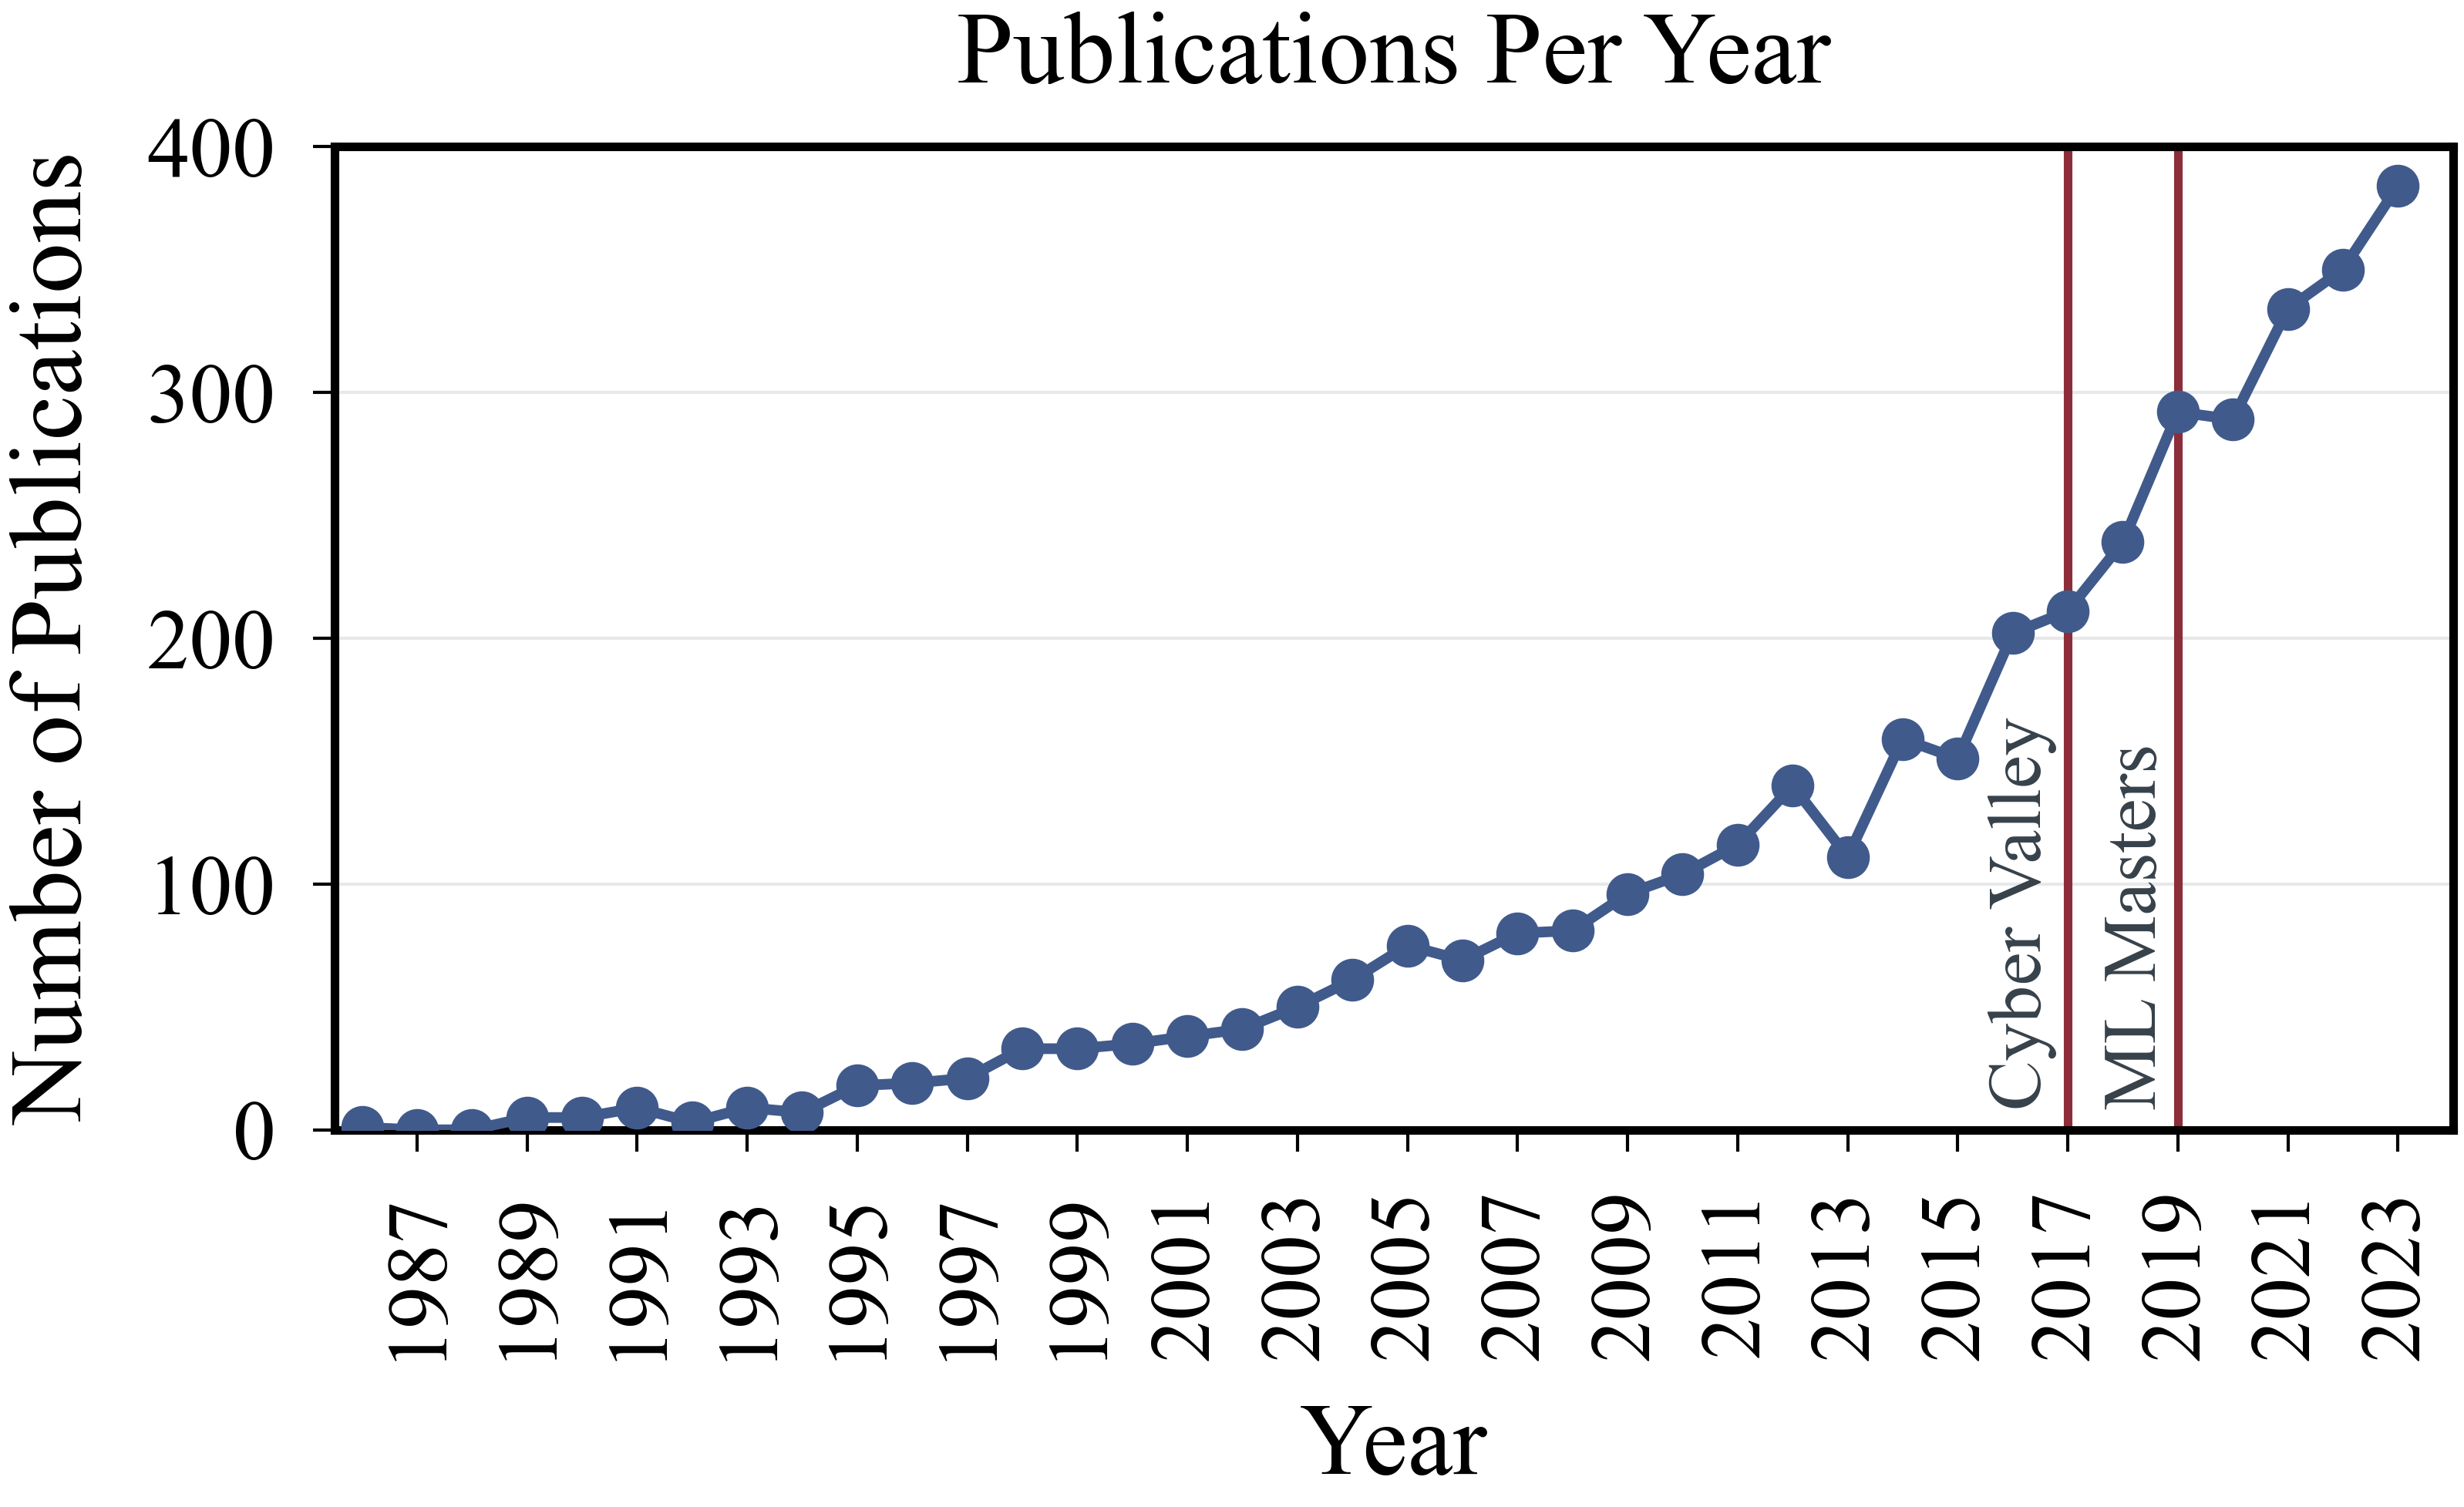

In [19]:
df = pd.read_csv("./../../dat/Publications.csv")

df = df.drop_duplicates(subset='Title', keep='first')

years = range(df['Year'].min(), df['Year'].max() + 1)

publications_per_year = df.groupby('Year').size()
publications_per_year = publications_per_year.reindex(years, fill_value=0)

fig, ax = plt.subplots()

ax.plot(publications_per_year.index, publications_per_year.values, '.-', ms=6, lw=1, color=rgb.tue_darkblue, zorder=3)

ax.axvline(start_year_cyber_valley, color=rgb.tue_red, alpha=1, ls='-', lw=0.8, zorder=2)
ax.axvline(start_year_ml_tue, color=rgb.tue_red, alpha=1, ls='-', lw=0.8, zorder=2)

ax.text(start_year_cyber_valley - 0.2, ax.get_ylim()[1] * 0.02, 'Cyber Valley', rotation=90, verticalalignment='bottom', horizontalalignment='right', color=rgb.tue_dark, fontsize=7, zorder=2)
ax.text(start_year_ml_tue - 0.1, ax.get_ylim()[1] * 0.02, 'ML Masters', rotation=90, verticalalignment='bottom', horizontalalignment='right', color=rgb.tue_dark, fontsize=7, zorder=2)

#ax.plot(publications_per_year.index, publications_per_year.values, '.-', ms=3, lw=0.75, color='black')

ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

ax.set_xlim([years[0] - 0.5, years[-1] + 1])
ax.set_xticks(years[1::2])
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)


ax.set_xlabel('Year', fontsize=9.5)
ax.set_ylabel('Number of Publications', fontsize=9.5)
ax.set_title('Publications Per Year', fontsize=9.5)

plt.show()

fig.savefig('./fig_PublicationsPerYear.pdf')